In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
project_path = os.path.dirname(os.path.abspath("__file__"))
input_path = project_path
data_path = project_path

# Data configuration

![./imgs/data_description_1.png](./imgs/data_description_1.png)
![./imgs/data_description_3.png](./imgs/data_description_2.png)
![./imgs/data_description_2.png](./imgs/data_description_3.png)

* For supervised learning

    * Labeled data: moldset_labeled.csv

    * Algorithms
    
        * SVM
        * RF
        * DNN
        * AE (Denosing AutoEncoder)

* For semi-supervised learning

    * Unlabeled data: unlabeled_data.csv
    
    * Algorithms
       
       * PCA
       * AE
       * SVDD (Deep SVDD)
    
       In baseline, 
    
       * SVM
       * NN
       
    Semi-superivsed learning is trained by entropy minimization and pseudo-labeling
    
    * Pseudo-labeling
    
        Pseudo-labeling is a method in which the predicted output for data without class variables using the learned model is regarded as a virtual class variable and used for future learning.

        
# Data configuration for semi-supervised learning

![./imgs/abstract_for_dataset.png](./imgs/abstract_for_dataset.png)

In [3]:
os.listdir(data_path)

['.ipynb_checkpoints',
 'aqc_bandit.yaml',
 'bandit_molding.ipynb',
 'baseline_molding.ipynb',
 'imgs',
 'moldset_labeled.csv',
 'NN_cn7.h5',
 'NN_rg3.h5',
 'README.md',
 'unlabeled_data.csv']

#  Exploratory data analysis

In [4]:
moldset_labeled = pd.read_csv(os.path.join(data_path, 'moldset_labeled.csv'), low_memory=False, index_col=0)

In [5]:
moldset_labeled

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,5f928a009c0189cc667e9bfc,2020-10-23 07:44:00,2020-10-23 오전 12:00:00,11,86131T1000,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,0,None,...,23.700001,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389,5f928a2c9c0189cc667e9d13,2020-10-23 07:45:02,2020-10-23 오전 12:00:00,12,86141T1000,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,0,None,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2390,5f928a2d9c0189cc667e9d19,2020-10-23 07:45:02,2020-10-23 오전 12:00:00,11,86131T1000,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,0,None,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2391,5f928a669c0189cc667e9e61,2020-10-23 07:46:03,2020-10-23 오전 12:00:00,12,86141T1000,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,0,None,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
"ERR_FACT_QTY" in moldset_labeled.columns

False

In [7]:
moldset_labeled["EQUIP_NAME"].value_counts()

650톤-우진2호기    2607
Name: EQUIP_NAME, dtype: int64

In [8]:
moldset_labeled["PART_NO"].value_counts()

86141AA000    713
86131AA000    712
86131T1000    591
86141T1000    591
Name: PART_NO, dtype: int64

In [9]:
parts = moldset_labeled["PART_NO"].value_counts().index.tolist()

In [10]:
moldset_labeled.head()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
moldset_labeled.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NO', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail',
       'Reason', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Switch_Over_Position', 'Plasticizing_Position', 'Clamp_Open_Position',
       'Max_Injection_Speed', 'Max_Screw_RPM', 'Average_Screw_RPM',
       'Max_Injection_Pressure', 'Max_Switch_Over_Pressure',
       'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_1',
       'Barrel_Temperature_2', 'Barrel_Temperature_3', 'Barrel_Temperature_4',
       'Barrel_Temperature_5', 'Barrel_Temperature_6', 'Barrel_Temperature_7',
       'Hopper_Temperature', 'Mold_Temperature_1', 'Mold_Temperature_2',
       'Mold_Temperature_3', 'Mold_Temperature_4', 'Mold_Temperature_5',
       'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
       'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temper

In [12]:
list_label_drop_cols = ['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 
                  'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason', 'Mold_Temperature_1', 'Mold_Temperature_2', 
                  'Barrel_Temperature_7', 'Switch_Over_Position','Mold_Temperature_5',
                  'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
                  'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11','Mold_Temperature_12']

list_unlabel_drop_cols = ['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 
                  'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'ERR_FACT_QTY', 'Mold_Temperature_1', 'Mold_Temperature_2', 
                  'Barrel_Temperature_7', 'Switch_Over_Position','Mold_Temperature_5',
                  'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
                  'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11','Mold_Temperature_12']

In [13]:
moldset_labeled = moldset_labeled.drop(list_label_drop_cols, axis=1)

In [14]:
moldset_unlabeled = pd.read_csv(os.path.join(data_path, 'unlabeled_data.csv'), low_memory=False, index_col=0)

In [15]:
moldset_unlabeled

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f9136166e37704af878240e,2020-01-02 00:59:22,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,3.18,...,0.0,0.0,0,0,0,0,0,0,0,0
1,5f9136166e37704af878240f,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,...,0.0,0.0,0,0,0,0,0,0,0,0
2,5f9136166e37704af8782410,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.29,...,0.0,0.0,0,0,0,0,0,0,0,0
3,5f9136166e37704af8782411,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.28,...,0.0,0.0,0,0,0,0,0,0,0,0
4,5f9136166e37704af8782412,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.28,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,5f926a806e37704af88455fb,2020-10-23 05:30:20,2020-10-23 오전 12:00:00,13,84721G9000,IK PNL C/PAD MAIN LHD,S10,3300TON-우진,0,12.09,...,0.0,0.0,0,0,0,0,0,0,0,0
795311,5f926a806e37704af88455fc,2020-10-23 05:30:24,2020-10-23 오전 12:00:00,10,86141S8900,LX2 W/S SIDE MLD'G RH(RHD),S12,650톤-우진,0,11.47,...,20.2,23.6,0,0,0,0,0,0,0,0
795312,5f926ab26e37704af88455fe,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,2,16.34,...,0.0,0.0,0,0,0,0,0,0,0,0
795313,5f926ab26e37704af88455ff,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,2,16.34,...,0.0,0.0,0,0,0,0,0,0,0,0


In [16]:
moldset_unlabeled.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NO', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'ERR_FACT_QTY',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11

In [17]:
moldset_unlabeled = moldset_unlabeled.drop(list_unlabel_drop_cols, axis=1)

In [18]:
moldset_labeled_cn7 = moldset_labeled.loc[(moldset_labeled["PART_NO"] == "86131AA000") | (moldset_labeled["PART_NO"] == "86141AA000")].copy()
moldset_labeled_rg3 = moldset_labeled.loc[(moldset_labeled["PART_NO"] == "86131T1000") | (moldset_labeled["PART_NO"] == "86141T1000")].copy()

moldset_unlabeled_cn7 = moldset_unlabeled.loc[(moldset_unlabeled["PART_NO"] == "86131AA000") | (moldset_unlabeled["PART_NO"] == "86141AA000")].copy()
moldset_unlabeled_rg3 = moldset_unlabeled.loc[(moldset_unlabeled["PART_NO"] == "86131T1000") | (moldset_unlabeled["PART_NO"] == "86141T1000")].copy()

In [19]:
moldset_labeled_cn7 = moldset_labeled_cn7.drop("PART_NO", axis=1)
moldset_labeled_rg3 = moldset_labeled_rg3.drop("PART_NO", axis=1)

moldset_unlabeled_cn7 = moldset_unlabeled_cn7.drop("PART_NO", axis=1)
moldset_unlabeled_rg3 = moldset_unlabeled_rg3.drop("PART_NO", axis=1)

In [20]:
moldset_labeled_cn7

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,0,9.62,4.51,16.790001,59.580002,7.12,653.450012,68.589996,647.98999,55.299999,...,59.700001,276.700012,276.200012,275.100006,270.399994,255.000000,230.399994,65.900002,21.600000,23.0
2603,0,9.63,4.51,16.799999,59.560001,7.12,653.450012,68.599998,647.98999,55.200001,...,59.799999,275.899994,276.000000,275.100006,271.299988,254.899994,229.600006,65.599998,21.600000,22.9
2604,0,9.63,4.51,16.799999,59.560001,7.12,653.450012,68.599998,647.98999,55.200001,...,59.799999,275.899994,276.000000,275.100006,271.299988,254.899994,229.600006,65.599998,21.600000,22.9
2605,0,9.62,4.51,16.799999,59.580002,7.12,653.450012,68.589996,647.98999,55.200001,...,59.700001,275.700012,275.000000,274.700012,271.500000,255.000000,229.800003,65.800003,21.600000,22.9


In [21]:
moldset_labeled_rg3

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
1211,0,1.06,0.93,13.01,61.779999,6.81,654.289978,53.560001,4.63,128.500000,...,60.299999,286.000000,285.000000,285.000000,275.399994,265.100006,234.899994,65.800003,21.600000,22.500000
1212,0,1.06,0.93,13.01,61.779999,6.81,654.289978,53.560001,4.63,128.500000,...,60.299999,286.000000,285.000000,285.000000,275.399994,265.100006,234.899994,65.800003,21.600000,22.500000
1213,0,1.06,0.93,12.99,61.779999,6.81,654.280029,53.580002,4.63,128.500000,...,60.500000,286.200012,285.799988,285.000000,275.600006,265.600006,234.800003,65.800003,21.500000,22.500000
1214,0,1.06,0.93,12.99,61.779999,6.81,654.280029,53.580002,4.63,128.500000,...,60.500000,286.200012,285.799988,285.000000,275.600006,265.600006,234.800003,65.800003,21.500000,22.500000
1215,0,1.06,0.93,12.95,61.759998,6.81,654.270020,53.560001,4.63,128.399994,...,60.200001,286.500000,285.100006,285.000000,276.000000,265.100006,234.699997,65.900002,21.500000,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0,1.06,0.94,12.87,61.759998,6.80,654.239990,53.590000,4.63,128.100006,...,61.599998,286.399994,285.200012,285.000000,276.000000,265.100006,235.300003,65.599998,23.700001,25.200001
2389,0,1.06,0.94,12.85,61.740002,6.79,654.239990,53.599998,4.63,128.000000,...,61.500000,286.700012,285.100006,285.000000,276.000000,264.700012,234.699997,65.599998,23.600000,25.200001
2390,0,1.06,0.94,12.85,61.740002,6.79,654.239990,53.599998,4.63,128.000000,...,61.500000,286.700012,285.100006,285.000000,276.000000,264.700012,234.699997,65.599998,23.600000,25.200001
2391,0,1.06,0.94,12.90,61.720001,6.80,654.250000,53.599998,4.63,128.100006,...,61.500000,285.299988,285.799988,284.799988,275.700012,265.000000,234.800003,65.500000,23.600000,25.200001


In [22]:
moldset_unlabeled_cn7

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
114610,10.19,3.07,16.82,72.24,7.10,653.71,65.48,652.00,74.7,30.7,...,33.9,270.9,275.5,274.5,270.1,264.7,240.0,58.9,22.0,23.1
114688,10.22,3.10,16.83,72.30,7.10,653.69,65.68,652.00,74.2,30.7,...,34.1,271.6,276.1,274.7,270.5,264.7,240.3,59.2,22.8,24.6
114919,10.21,3.10,16.85,72.24,7.10,653.70,65.69,652.00,74.2,30.7,...,33.9,270.8,275.0,274.7,270.1,265.7,239.7,58.6,21.2,22.7
115304,10.22,3.10,16.81,72.24,7.10,653.72,65.69,652.00,74.3,30.7,...,33.9,271.2,275.5,275.2,271.0,264.7,240.2,58.6,19.1,20.0
115582,10.22,3.10,16.86,72.30,7.10,653.69,65.70,652.00,74.2,30.6,...,33.9,271.4,274.9,275.0,270.3,265.1,239.8,58.6,19.8,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777212,9.50,4.39,18.16,59.46,7.12,653.41,68.40,647.99,57.2,30.9,...,59.2,276.3,275.3,275.5,271.2,255.2,230.2,68.8,23.5,24.6
777215,9.43,4.32,19.02,59.44,7.12,653.43,68.35,647.99,58.8,31.0,...,58.6,275.8,275.7,274.7,271.8,255.1,230.0,69.5,23.5,24.5
777216,9.43,4.32,19.02,59.44,7.12,653.43,68.35,647.99,58.8,31.0,...,58.6,275.8,275.7,274.7,271.8,255.1,230.0,69.5,23.5,24.5
777219,9.36,4.24,21.10,59.36,7.12,653.45,68.12,647.99,60.5,31.2,...,57.7,276.2,275.0,275.3,271.7,254.9,230.5,69.5,23.5,24.5


In [23]:
moldset_unlabeled_rg3

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
99665,6.00,6.00,2.90,39.10,3.4,18.70,40.50,522.50,37.9,0.0,...,0.0,0.0,264.8,269.9,270.1,260.2,239.7,60.0,0.0,0.0
99669,6.00,6.00,2.80,39.20,3.4,18.80,40.50,522.50,40.0,0.0,...,0.0,0.0,264.8,269.9,270.1,260.1,239.6,59.9,0.0,0.0
99670,6.00,6.00,2.90,39.20,3.4,18.70,40.50,522.60,39.5,0.0,...,0.0,0.0,264.8,270.0,270.0,260.1,239.7,59.9,0.0,0.0
99674,6.00,6.00,2.80,39.10,3.4,18.80,40.50,522.50,40.7,0.0,...,0.0,0.0,264.8,270.1,270.0,260.0,239.8,59.9,0.0,0.0
99675,6.00,6.00,2.80,39.10,3.4,18.80,40.50,522.50,40.9,0.0,...,0.0,0.0,264.9,270.1,270.1,259.9,240.0,59.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795299,1.06,0.94,12.93,61.78,6.8,654.24,53.59,4.63,128.0,30.8,...,61.2,286.9,284.6,285.4,274.5,266.0,234.7,64.9,23.2,24.7
795303,1.06,0.94,12.90,61.78,6.8,654.24,53.59,4.63,128.1,30.9,...,61.5,286.5,285.6,285.3,275.7,265.0,235.1,64.9,23.3,24.7
795304,1.06,0.94,12.90,61.78,6.8,654.24,53.59,4.63,128.1,30.9,...,61.5,286.5,285.6,285.3,275.7,265.0,235.1,64.9,23.3,24.7
795308,1.06,0.94,12.89,61.76,6.8,654.24,53.59,4.63,128.1,30.9,...,61.6,285.7,285.0,285.0,276.1,264.8,234.8,64.5,23.3,24.7


## moldset_unlabeled_cn7

In [24]:
moldset_unlabeled_cn7.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,...,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000
mean,6.424337,4.218894,10.436911,50.905432,5.141773,359.175364,52.581079,434.434858,56.389434,16.472642,...,27.234318,145.529239,267.087272,268.502999,265.401555,254.059596,233.254549,57.740971,12.841428,14.730523
std,3.020516,1.444531,7.396193,13.369645,1.868678,317.320806,13.087495,235.942618,29.437641,15.334763,...,29.014509,135.601133,11.345312,10.124143,8.909881,7.613118,6.257067,10.945172,12.181921,14.162900
min,1.000000,0.300000,0.500000,0.000000,2.800000,15.800000,32.180000,0.000000,25.100000,0.000000,...,0.000000,0.000000,244.200000,231.600000,239.100000,234.400000,219.200000,34.300000,0.000000,0.000000
25%,5.000000,3.890000,2.800000,36.600000,3.200000,17.300000,40.300000,485.900000,36.500000,0.000000,...,0.000000,0.000000,264.600000,264.900000,264.800000,254.600000,229.800000,57.800000,0.000000,0.000000
50%,5.000000,4.490000,12.810000,59.520000,5.990000,653.410000,52.660000,522.200000,49.900000,30.300000,...,12.200000,245.100000,264.900000,269.900000,269.400000,255.000000,234.700000,61.600000,20.500000,22.000000
75%,9.560000,5.000000,16.860000,63.600000,7.120000,653.560000,68.470000,647.990000,56.100000,30.700000,...,59.300000,276.100000,275.400000,275.000000,270.500000,259.600000,239.900000,65.200000,23.400000,26.700000
max,11.400000,6.000000,97.080000,119.880000,7.270000,655.330000,75.750000,652.000000,128.200000,62.900000,...,112.900000,287.500000,286.200000,285.800000,279.000000,267.200000,242.800000,73.400000,38.600000,48.600000


<AxesSubplot:>

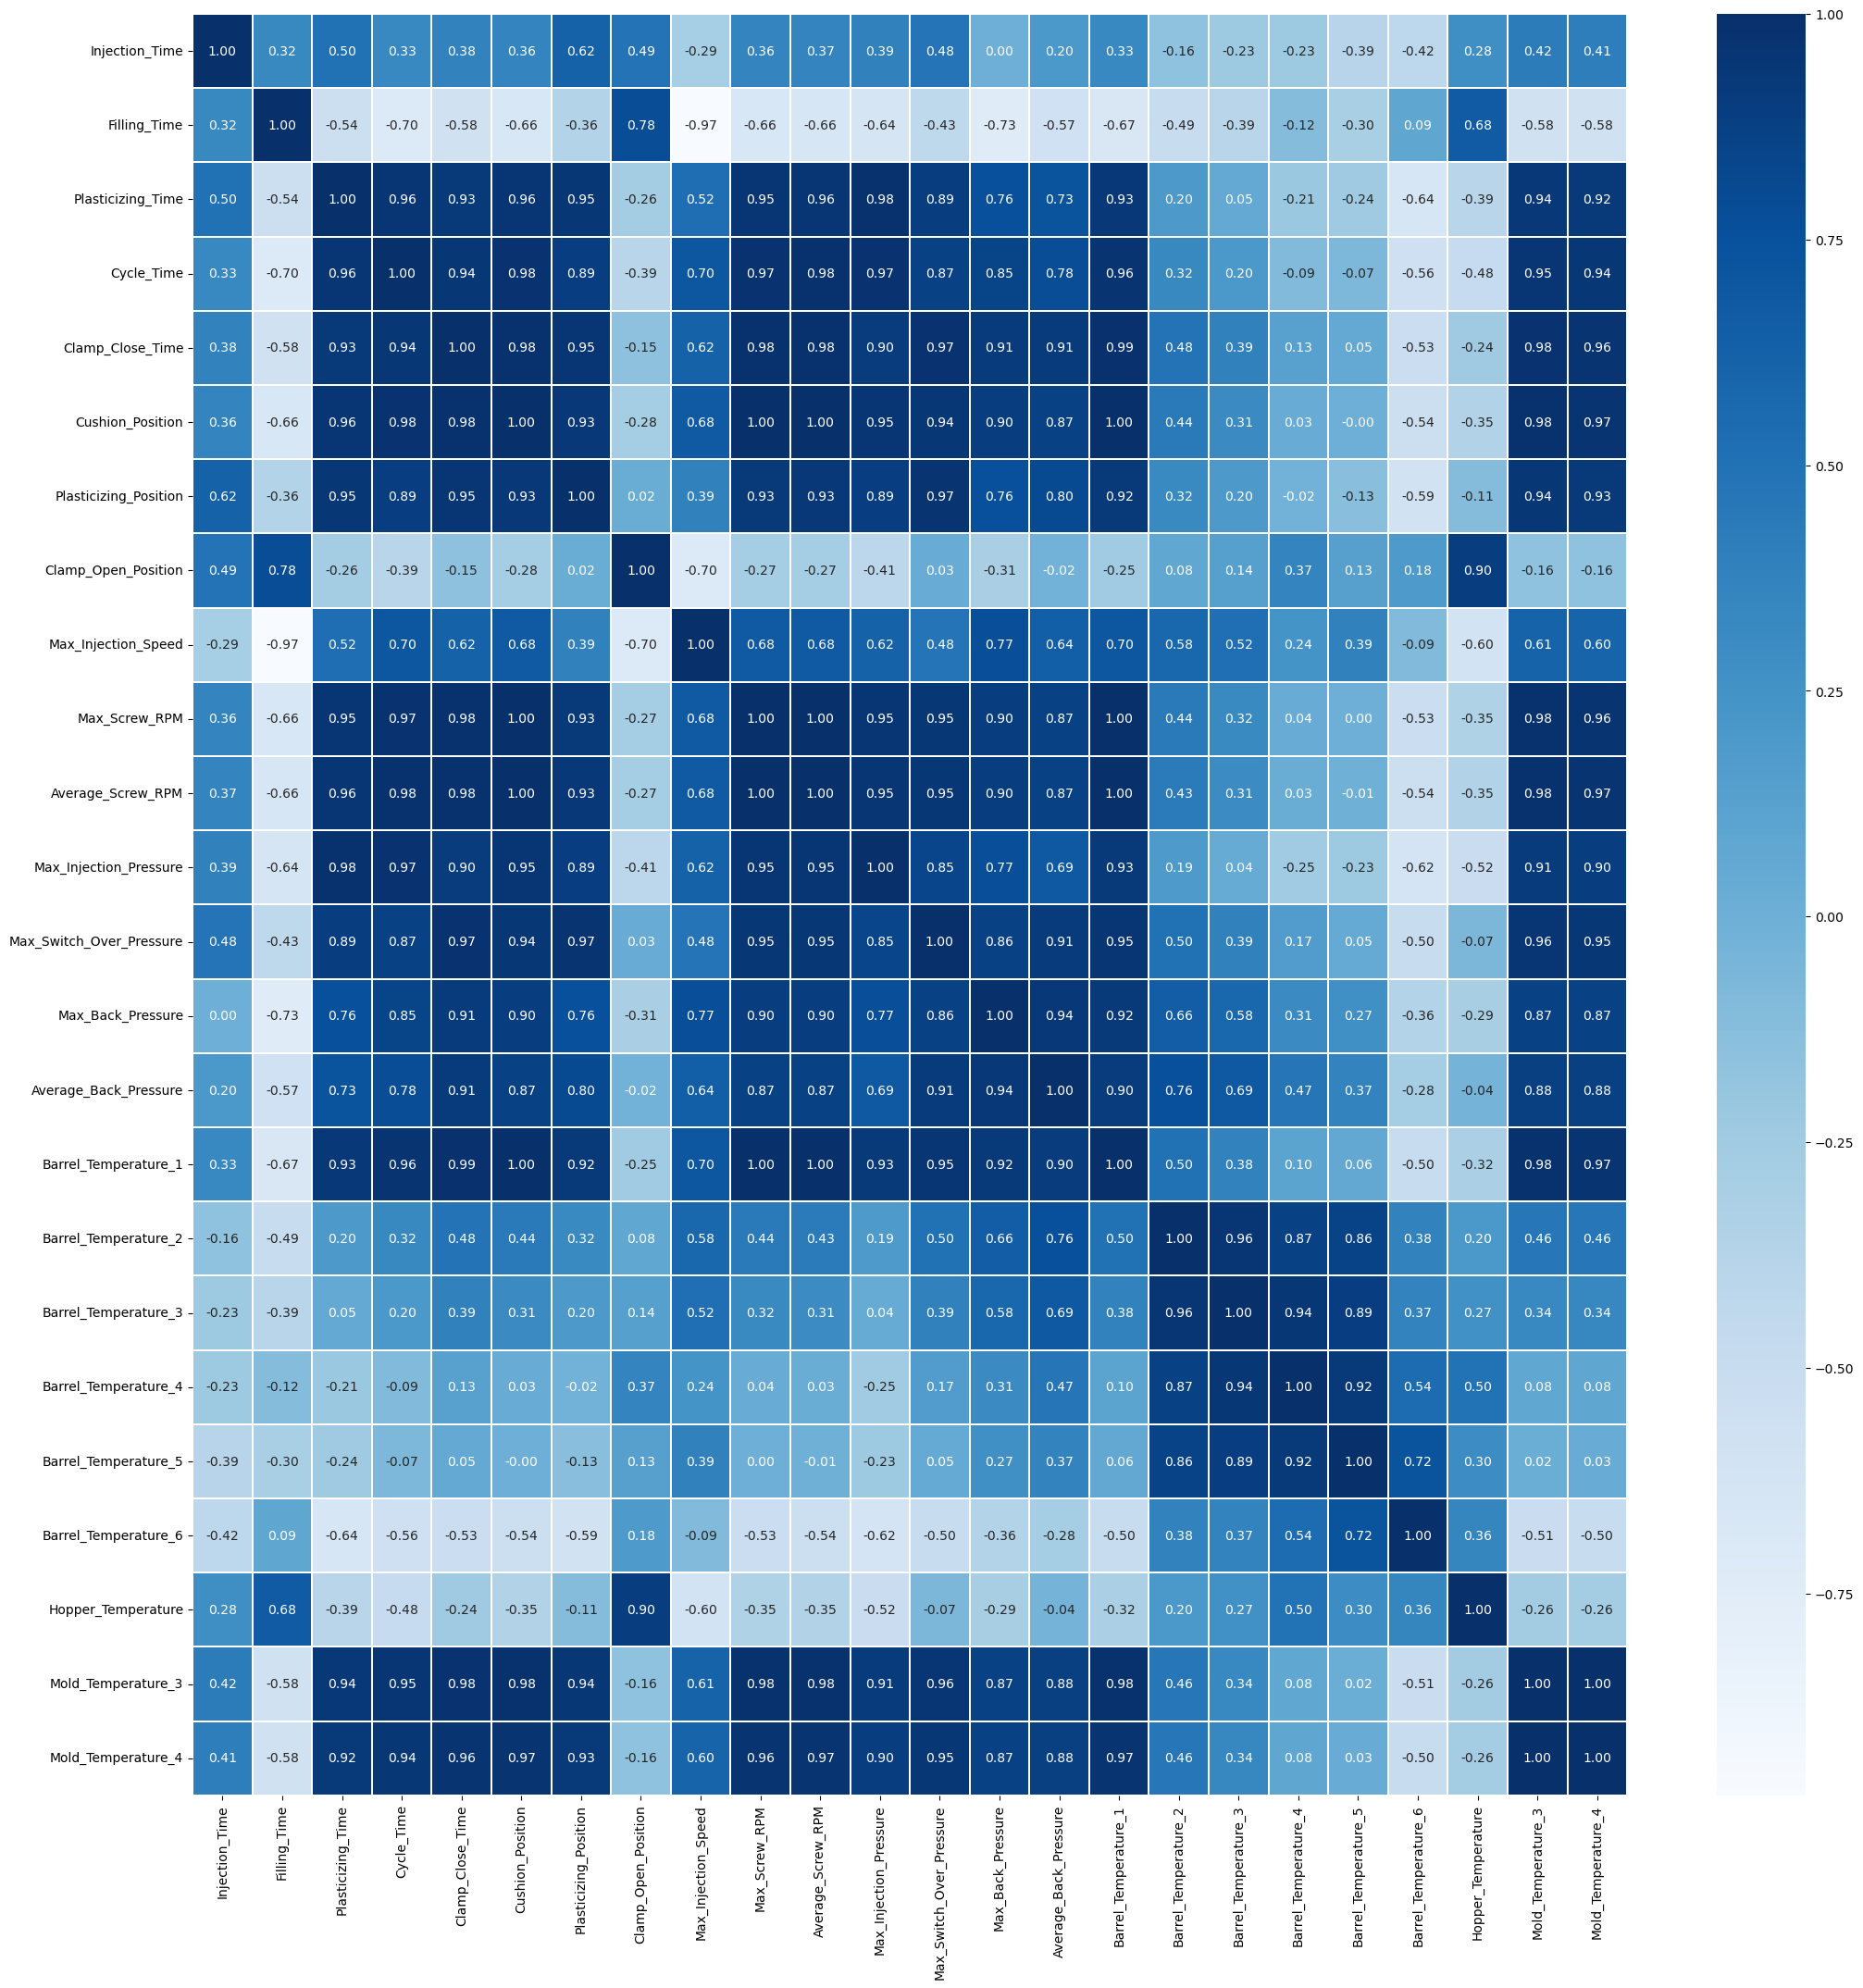

In [25]:
plt.subplots(figsize=[25,25])
sns.heatmap(data=moldset_unlabeled_cn7.corr(), linewidth=0.1,annot=True,fmt=".2f",cmap="Blues")

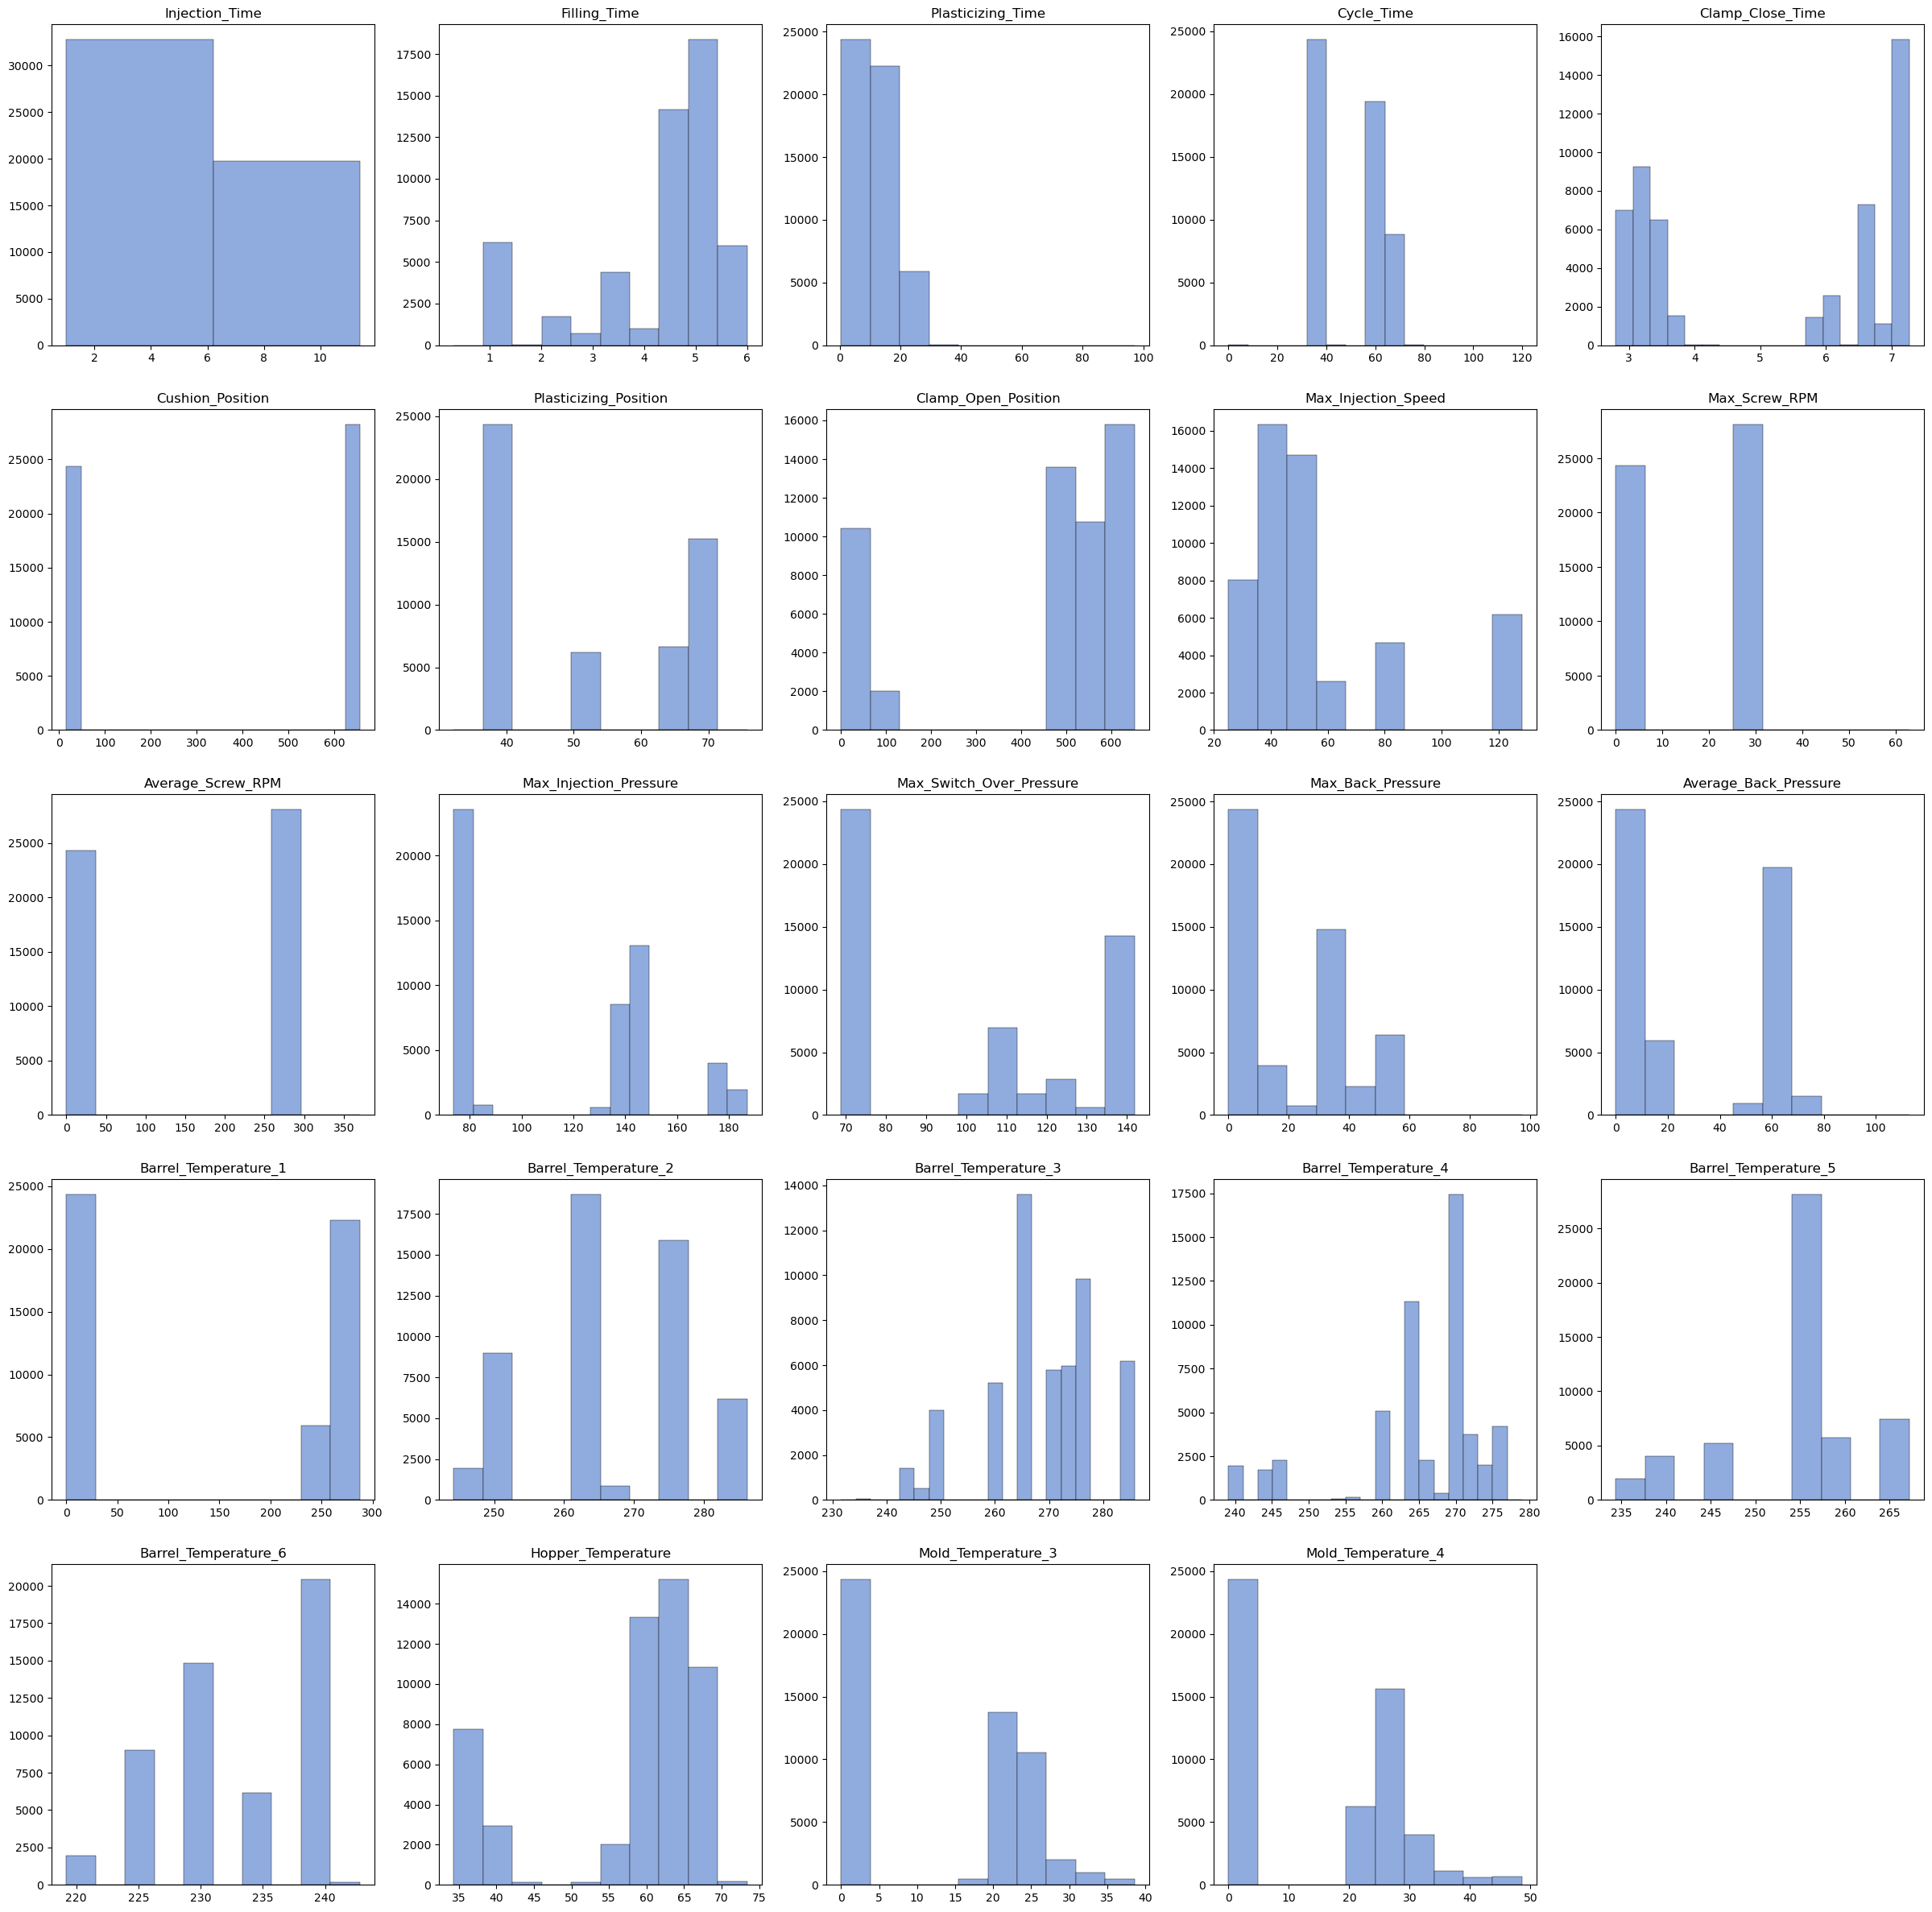

In [26]:
plt.figure(figsize=[30,30])

bins = [2,10,10,15,17,20,10,10,10,10,10,15,10,10,10,10,10,20,20,10,10,10,10,10,20,25,35,35]

for index, value in enumerate(moldset_unlabeled_cn7):
    sub = plt.subplot(5,5,index+1)
    sub.hist(moldset_unlabeled_cn7[value], bins=bins[index], facecolor=(144/255,171/255,221/255), linewidth=.3, edgecolor="black")
    plt.title(value)

## moldset_unlabeled_rg3

In [27]:
moldset_unlabeled_rg3.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,...,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000
mean,3.515335,2.778947,9.631108,53.469702,5.357147,405.104732,48.223423,209.289599,86.657328,20.604886,...,36.580767,169.379563,273.179625,274.535830,269.174136,259.571657,235.694215,58.029599,14.053569,15.813630
std,2.837536,2.087176,6.238300,12.758191,1.633415,310.466273,7.846830,243.368693,41.854656,18.345535,...,33.234145,136.544147,12.796782,12.004843,9.526382,8.061772,4.830513,9.782343,11.607758,13.580681
min,0.130000,0.000000,0.400000,0.000000,2.800000,0.000000,33.350000,0.000000,0.000000,0.000000,...,0.000000,0.000000,244.200000,234.400000,239.100000,234.400000,219.500000,33.200000,0.000000,0.000000
25%,1.050000,0.930000,2.900000,38.900000,3.400000,18.700000,40.500000,4.630000,39.900000,0.000000,...,0.000000,0.000000,264.800000,269.900000,269.800000,259.800000,234.800000,58.000000,0.000000,0.000000
50%,2.630000,1.650000,12.800000,61.760000,6.640000,654.250000,52.540000,35.630000,79.500000,30.700000,...,58.200000,246.000000,265.400000,270.100000,270.200000,260.300000,235.100000,61.300000,20.500000,22.000000
75%,5.000000,5.000000,13.030000,63.600000,6.740000,654.280000,53.570000,522.100000,127.500000,30.900000,...,60.800000,286.000000,285.100000,285.000000,275.200000,265.000000,239.900000,64.100000,22.400000,24.000000
max,11.390000,6.000000,38.710000,76.190000,15.100000,655.160000,72.760000,654.990000,128.800000,62.900000,...,136.000000,287.600000,286.700000,286.000000,278.100000,266.900000,241.000000,71.200000,34.800000,45.900000


<AxesSubplot:>

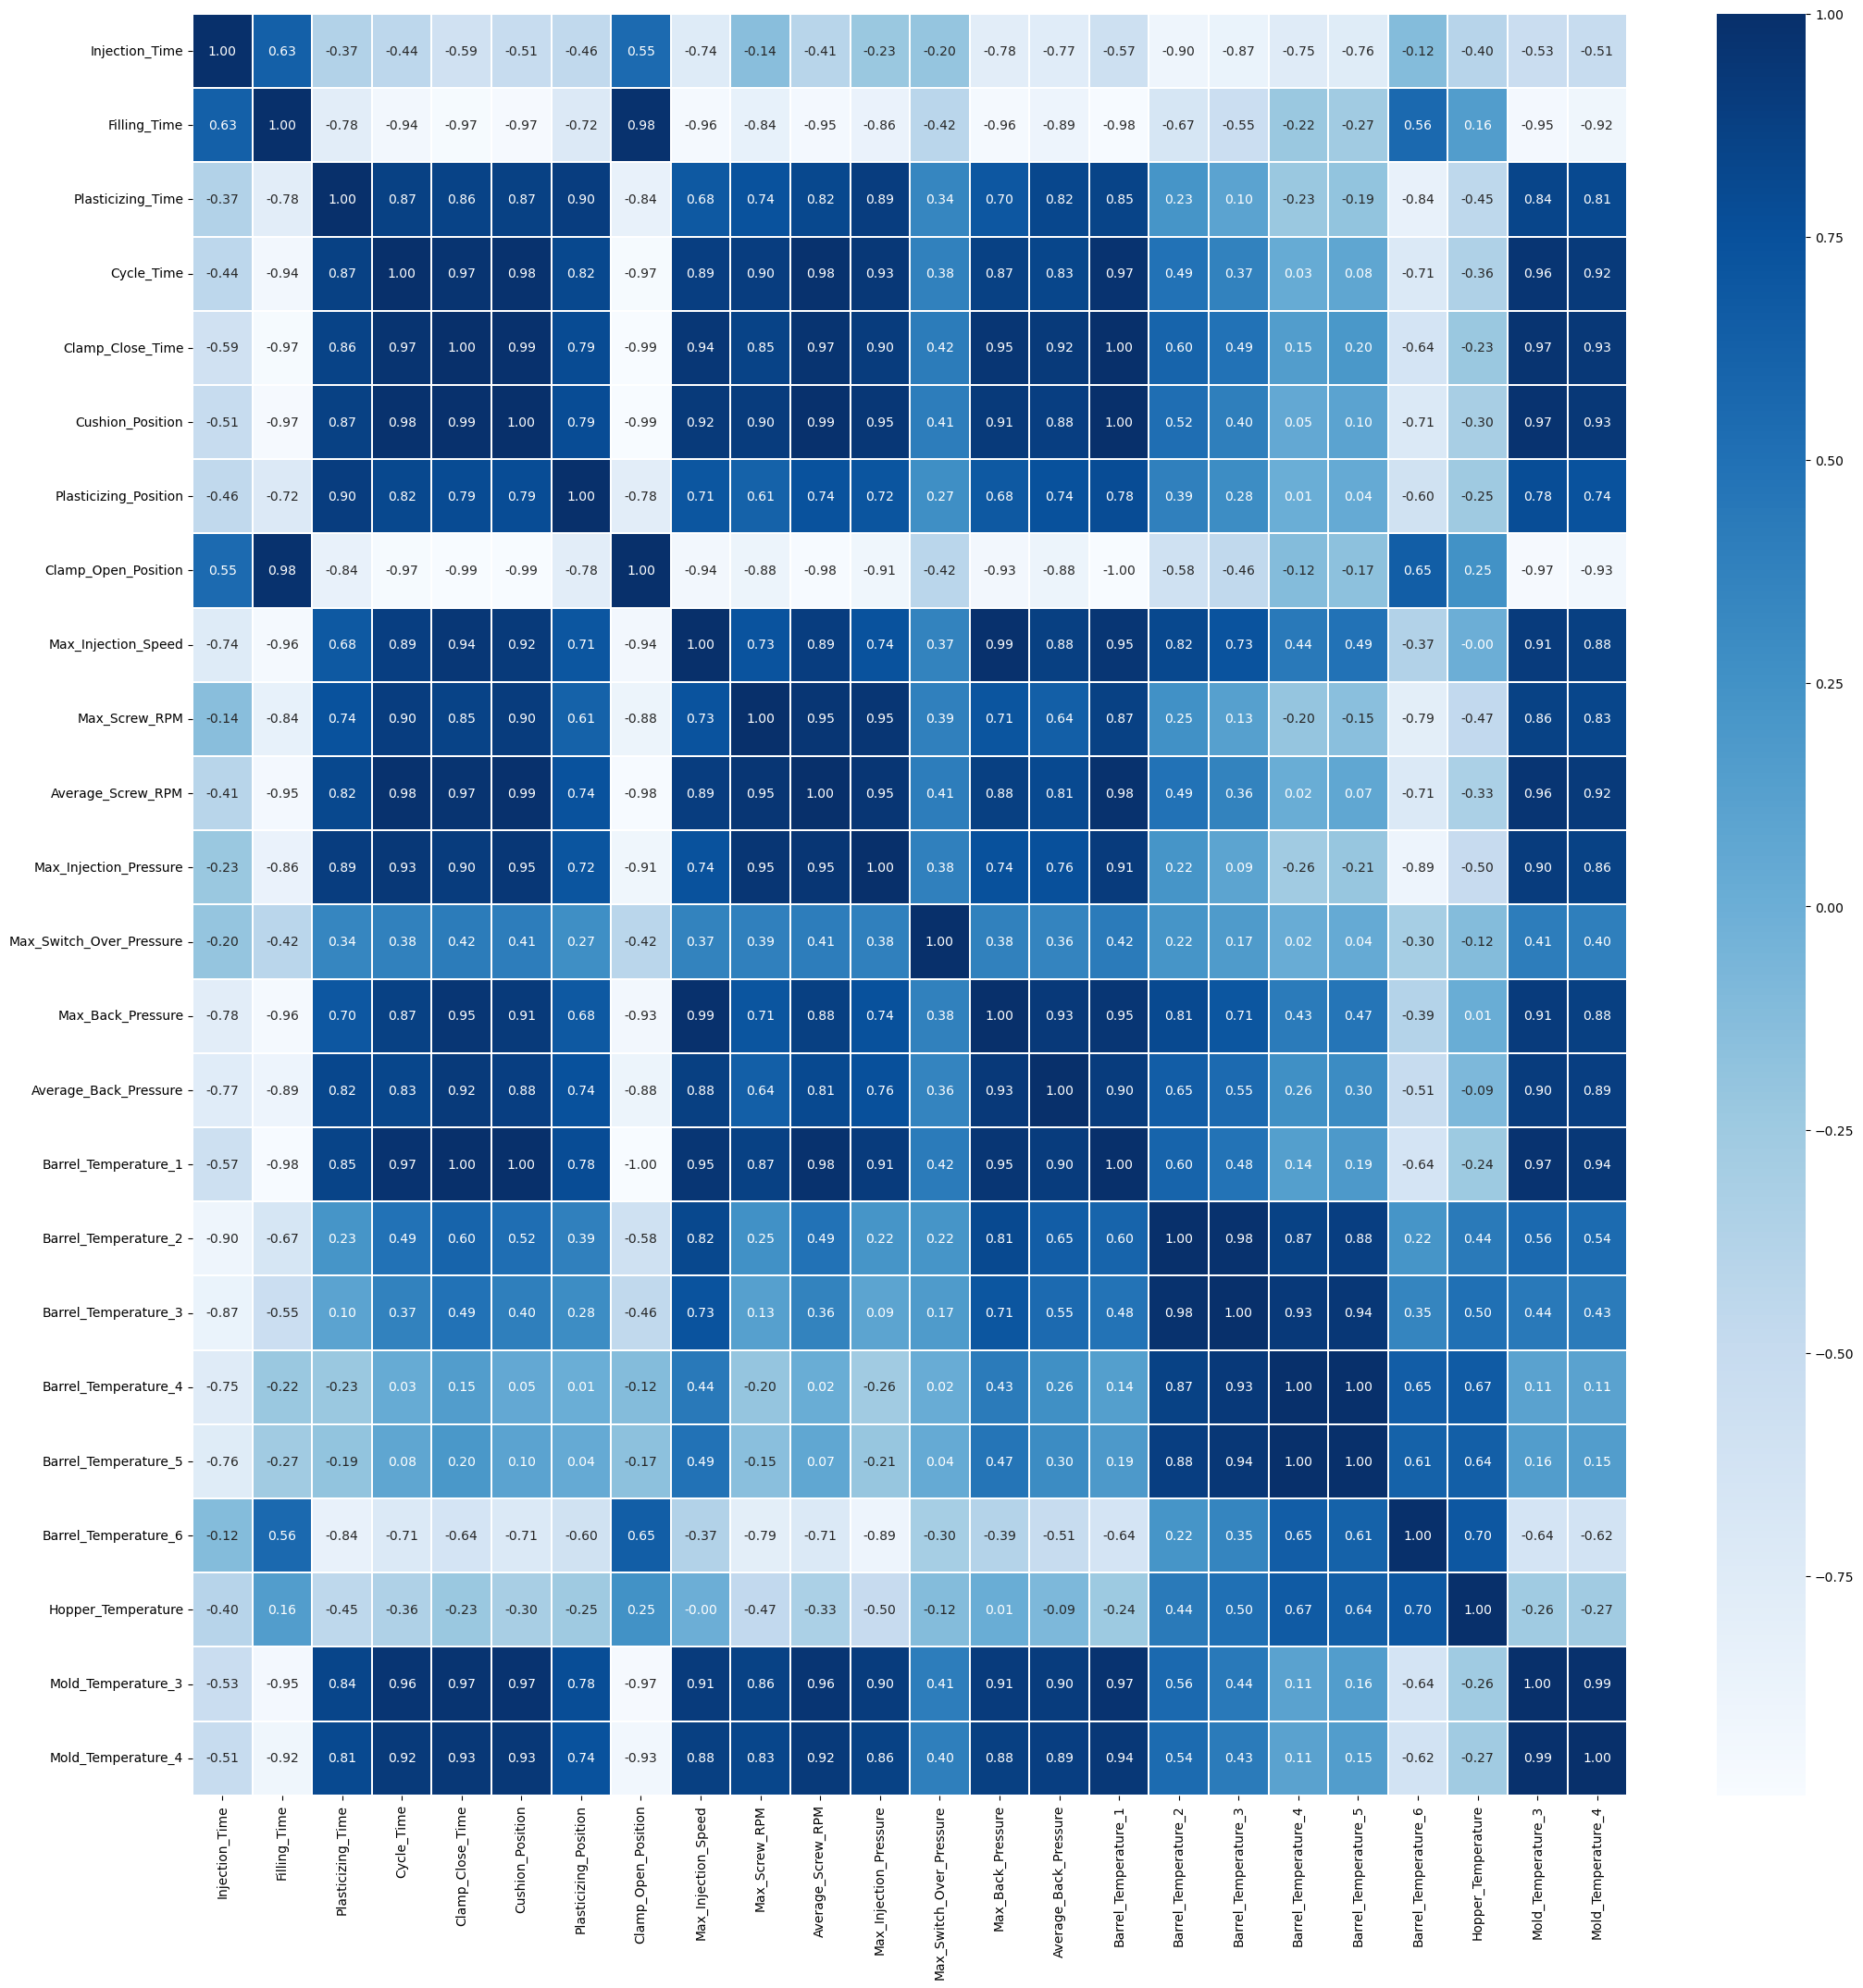

In [28]:
plt.subplots(figsize=[25,25])
sns.heatmap(data=moldset_unlabeled_rg3.corr(), linewidth=0.1,annot=True,fmt=".2f",cmap="Blues")

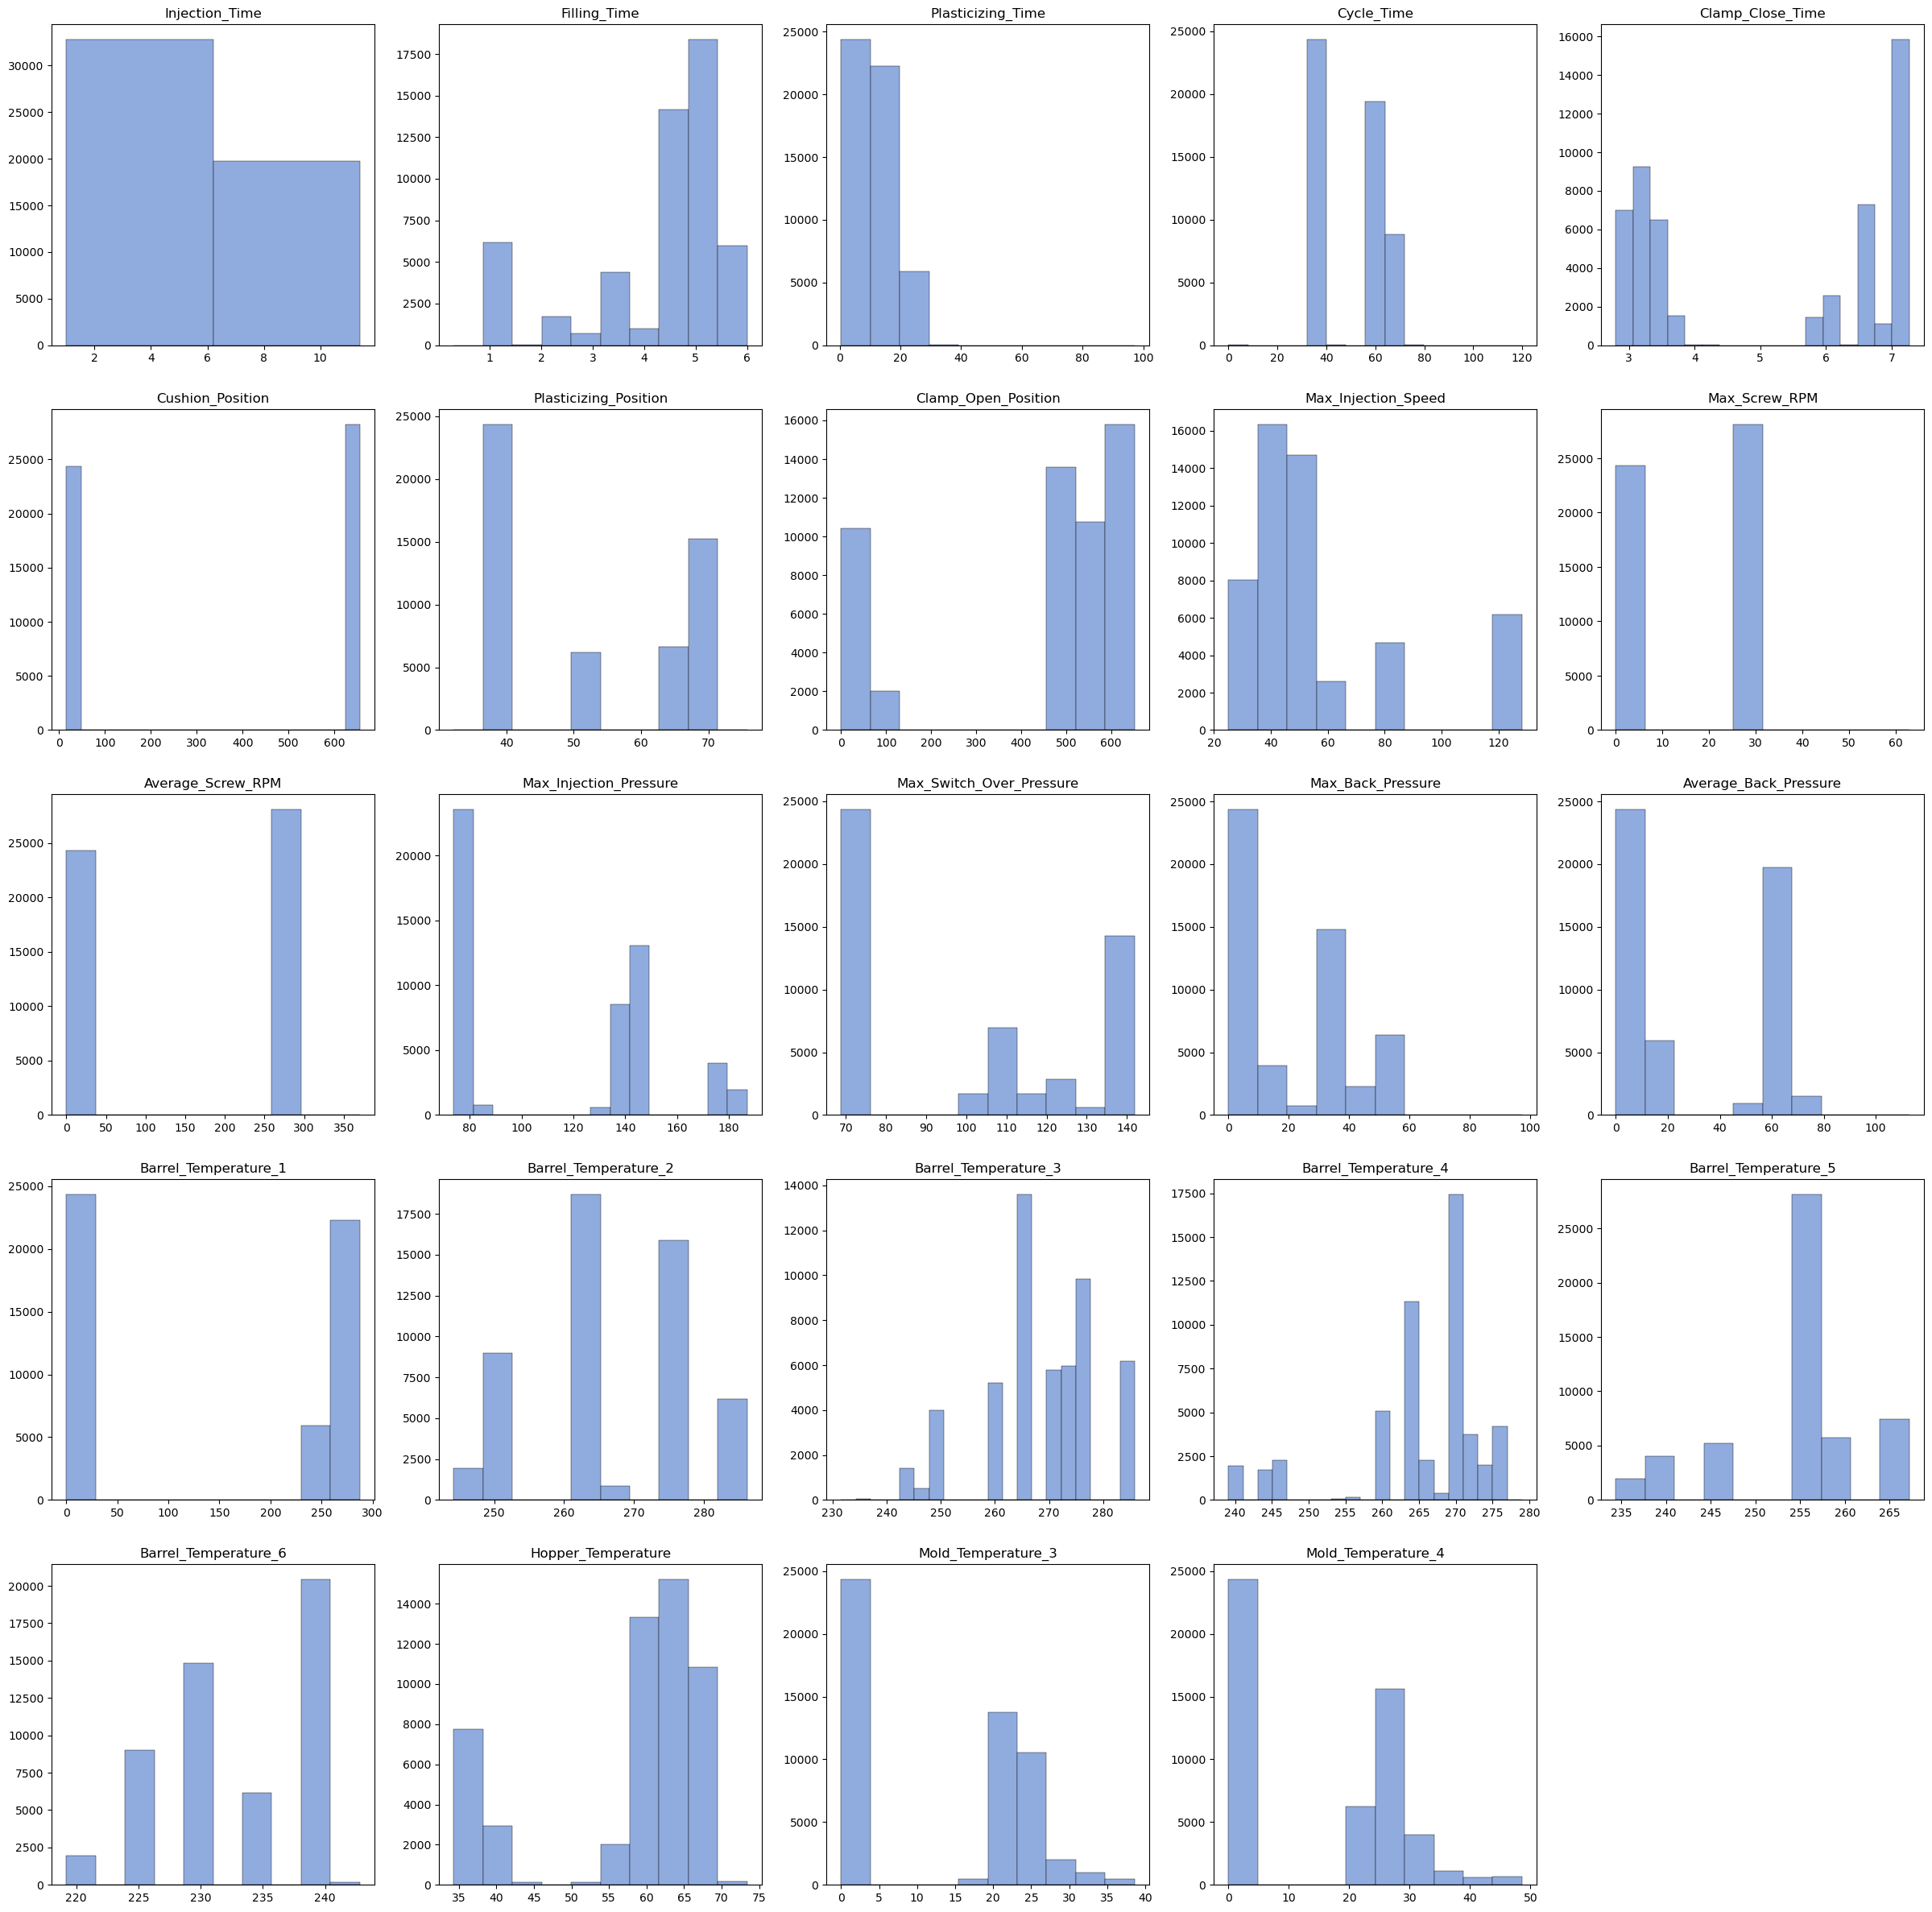

In [29]:
plt.figure(figsize=[30,30])

bins = [2,10,10,15,17,20,10,10,10,10,10,15,10,10,10,10,10,20,20,10,10,10,10,10,20,25,35,35]

for index, value in enumerate(moldset_unlabeled_rg3):
    sub = plt.subplot(5,5,index+1)
    sub.hist(moldset_unlabeled_cn7[value], bins=bins[index], facecolor=(144/255,171/255,221/255), linewidth=.3, edgecolor="black")
    plt.title(value)

# Data cleaning

In [30]:
moldset_labeled_cn7.loc[:, "PassOrFail"] = moldset_labeled_cn7.PassOrFail.astype("int")
moldset_labeled_rg3.loc[:, "PassOrFail"] = moldset_labeled_rg3.PassOrFail.astype("int")

In [31]:
moldset_labeled_cn7.PassOrFail.value_counts()

0    1398
1      27
Name: PassOrFail, dtype: int64

In [32]:
moldset_labeled_rg3.PassOrFail.value_counts()

0    1157
1      25
Name: PassOrFail, dtype: int64

In [33]:
data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]
for d in data:
    for column in d.columns:
        if column != "PassOrFail":
            sc = StandardScaler()
            d[[column]] = sc.fit_transform(d[[column]])

# Train baseline models for semi-superivsed learning for CN7 and RG3 data


## CN7

### Support vector machine classifier (SVC)

In [34]:
def confident_prediction(df):
    result = []
    
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])
    return result

In [35]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y,y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
    print("Precision: {:.2f}".format(precision_score(y,y_pred)))
    print("Recall: {:.2f}".format(recall_score(y,y_pred)))
    print(roc_auc_score(y,y_pred))
    print(f1_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

class DataLoader_CN7():
    def __init__(self):
        moldset_labeled = moldset_labeled_cn7
        moldset_unlabeled = moldset_unlabeled_cn7
        
        sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=9)
        
        for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"], moldset_labeled["PassOrFail"]):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"].iloc[test_index]
            
            moldset_labeled_train_Y = moldset_labeled["PassOrFail"].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled["PassOrFail"].iloc[test_index]
            
            self.moldset_labeled_train_X = moldset_labeled_train_X
            self.moldset_labeled_test_X = moldset_labeled_test_X
            
            self.moldset_labeled_train_Y = moldset_labeled_train_Y
            self.moldset_labeled_test_Y = moldset_labeled_test_Y
            
            self.moldset_unlabeled = moldset_unlabeled

In [37]:
data = DataLoader_CN7()

In [38]:
data.moldset_unlabeled

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
114610,1.246707,-0.795348,0.863032,1.595762,1.047931,0.928201,0.985601,0.922119,0.622018,0.927794,...,0.229738,0.924564,0.741523,0.592352,0.527335,1.397654,1.078063,0.105895,0.751824,0.590949
114688,1.256639,-0.774580,0.864384,1.600250,1.047931,0.928138,1.000883,0.922119,0.605033,0.927794,...,0.236632,0.929726,0.794409,0.612107,0.572229,1.397654,1.126010,0.133305,0.817496,0.696861
114919,1.253329,-0.774580,0.867088,1.595762,1.047931,0.928169,1.001647,0.922119,0.605033,0.927794,...,0.229738,0.923827,0.697451,0.612107,0.527335,1.529007,1.030117,0.078485,0.686152,0.562706
115304,1.256639,-0.774580,0.861680,1.595762,1.047931,0.928232,1.001647,0.922119,0.608430,0.927794,...,0.229738,0.926777,0.741523,0.661494,0.628347,1.397654,1.110027,0.078485,0.513764,0.372066
115582,1.256639,-0.774580,0.868440,1.600250,1.047931,0.928138,1.002411,0.922119,0.605033,0.921272,...,0.229738,0.928252,0.688637,0.641740,0.549782,1.450195,1.046099,0.078485,0.571227,0.414430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777212,1.018267,0.118452,1.044208,0.639856,1.058634,0.927255,1.208717,0.905123,0.027535,0.940836,...,1.101724,0.964387,0.723894,0.691127,0.650794,0.149796,-0.488181,1.010412,0.874958,0.696861
777215,0.995092,0.069993,1.160485,0.638360,1.058634,0.927318,1.204896,0.905123,0.081888,0.947357,...,1.081045,0.960700,0.759151,0.612107,0.718136,0.136661,-0.520145,1.074368,0.874958,0.689800
777216,0.995092,0.069993,1.160485,0.638360,1.058634,0.927318,1.204896,0.905123,0.081888,0.947357,...,1.081045,0.960700,0.759151,0.612107,0.718136,0.136661,-0.520145,1.074368,0.874958,0.689800
777219,0.971917,0.014611,1.441713,0.632376,1.058634,0.927381,1.187322,0.905123,0.139638,0.960399,...,1.050025,0.963650,0.697451,0.671372,0.706912,0.110390,-0.440234,1.074368,0.874958,0.689800


In [39]:
# from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
# from sklearn.svm import SVC

# tuned_parameters = [{"kernel":["rbf"], "gamma":[i*1e-4 for i in range(1,100)], "C":[i*1e-4 for i in range(1,100)]}]
# scores = ["accuracy", "precision", "recall"]
# weights = {0:100.0, 1:1.0}

# kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
# X = moldset_labeled_cn7.copy()
# y = X.pop("PassOrFail")

# for score in scores:
#     clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid=tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
#     clf.fit(X,y)
    
#     print("Best Params: {}".format(clf.best_params_))

In [40]:
from copy import deepcopy
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
import time


def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader_CN7()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = deepcopy(data.moldset_unlabeled)
    without_label = moldset_unlabeled
    
    num_left_unlabeled = int(moldset_labeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    duration = 0
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
            weights = {0:100.0, 1:1.0}
            model = SVC(C=0.0001, kernel="rbf", gamma=0.0001, class_weight=weights, probability=True, random_state=42)
            begin_time = time.time()
            model.fit(X_with_label, Y_with_label)
            duration_indv = time.time() - begin_time
            duration += duration_indv
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label["confidence"] = confident_prob
            
            without_label = without_label.sort_values(by=["confidence"], ascending=False)
            length = without_label.shape[0]
            cutting_index = int(length * (percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={"confidence"}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index, :].drop(columns={"confidence"})
            pseudo_label = pd.DataFrame(model.predict(chosen_without_label))
            
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
        else:
            print()
            print("ALL DONE, UNLABLED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            print(f"Elapsed time for training {int(duration // 60)} min {duration % 60} sec")
            break

In [41]:
train_and_evaluate()

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\SDMLAB1\anaconda3\envs\aqc_bandit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]

ALL DONE, UNLABLED USED: 10%
Elapsed time for training 0 min 0.010994911193847656 sec


C:\Users\SDMLAB1\anaconda3\envs\aqc_bandit\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\SDMLAB1\anaconda3\envs\aqc_bandit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Deep nueral network (DNN)

In [42]:
def confident_prediction_1(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >= 0.5:
            result.append(df[i])
        else:
            result.append(1-df[i])
    return result

def predict(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

In [43]:
import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

from copy import deepcopy

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader_CN7()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = deepcopy(data.moldset_unlabeled)
    without_label = moldset_unlabeled
    
    num_left_unlabeled = int(moldset_labeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    model = Sequential()
    model.add(Dense(units=32, activation="relu", input_dim=24))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", 
                  metrics=["accuracy",tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")])
    
    duration = 0
    while True:
        print(without_label.shape[0], num_left_unlabeled)
        if without_label.shape[0] >= num_left_unlabeled:
            val_precision = 0
            val_recall = 0
            patience = 10
            cnt = 0
            
            for epoch in tqdm(range(100)):
                begin_time = time.time()
                history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
                duration_indv = time.time() - begin_time
                duration += duration_indv
                history = history.history
                if cnt >= patience:
                    break
                if history["val_precision"][0] >= val_precision and history["val_recall"][0] >= val_recall:
                    val_precision = history["val_precision"][0]
                    val_recall = history["val_recall"][0]
                    cnt = 0
                else:
                    cnt += 1
                    
                prob = model.predict_proba(without_label)
                confident_prob = confident_prediction_1(prob)
                without_label["confidence"] = confident_prob
                without_label = without_label.sort_values(by=["confidence"], ascending=False)
                length = without_label.shape[0]
                cutting_index = int(length*(percentage*0.01))
                chosen_without_label = without_label.iloc[:cutting_index, :]
                
                if len(chosen_without_label) == 0:
                    break
                
                chosen_without_label.drop(columns=["confidence"],inplace=True)
                notchosen_without_label = without_label.iloc[cutting_index:,:].drop(columns=["confidence"])
                pseudo_label = pd.DataFrame(predict(model.predict(chosen_without_label)))
                
                X_with_label = pd.concat([X_with_label, chosen_without_label])
                Y_with_label = pd.concat([Y_with_label, pseudo_label])
                without_label = notchosen_without_label
                
        else:
            print()
            print("ALL DONE, UNLABLED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            print(f"Elapsed time for training {int(duration // 60)} min {duration % 60} sec")
            model.save(os.path.join(input_path, "NN_cn7.h5"))
            break

In [44]:
%%time
train_and_evaluate()

52547 260


  0%|          | 0/100 [00:00<?, ?it/s]

1143/1143 [==============================] - 11s 9ms/step - loss: 0.0037 - accuracy: 0.9997 - precision: 0.9000 - recall: 0.4737 - val_loss: 0.3323 - val_accuracy: 0.9805 - val_precision: 0.6053 - val_recall: 0.6361


1159/1159 [==============================] - 11s 9ms/step - loss: 0.0033 - accuracy: 0.9997 - precision: 0.9091 - recall: 0.5263 - val_loss: 0.2045 - val_accuracy: 0.9622 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
571 260


  0%|          | 0/100 [00:00<?, ?it/s]

1168/1168 [==============================] - 11s 10ms/step - loss: 0.0022 - accuracy: 0.9997 - precision: 0.7692 - recall: 0.5263 - val_loss: 0.9190 - val_accuracy: 0.5473 - val_precision: 0.0707 - val_recall: 0.5620
165 260

ALL DONE, UNLABLED USED: 63%
Elapsed time for training 8 min 40.32002878189087 sec
Wall time: 9min 2s


In [45]:
from tensorflow.keras.models import load_model

data = DataLoader_CN7()
Y_test = data.moldset_labeled_test_Y
X_test = data.moldset_labeled_test_X

model = load_model(os.path.join(input_path, "NN_cn7.h5"))

In [46]:
y_pred = predict(model.predict(X_test))
evaluation(Y_test, y_pred)

Accuracy: 0.98
Precision: 0.60
Recall: 0.38
0.6851190476190476
0.4615384615384615
[[418   2]
 [  5   3]]


## RG3

### Support vector machine classifier (SVC)

In [47]:
def confident_prediction(df):
    result = []
    
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])
    return result

In [48]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y,y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
    print("Precision: {:.2f}".format(precision_score(y,y_pred)))
    print("Recall: {:.2f}".format(recall_score(y,y_pred)))
    print(roc_auc_score(y,y_pred))
    print(f1_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

class DataLoader_RG3():
    def __init__(self):
        moldset_labeled = moldset_labeled_rg3
        moldset_unlabeled = moldset_unlabeled_rg3
        
        sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=0)
        
        for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"], moldset_labeled["PassOrFail"]):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!="PassOrFail"].iloc[test_index]
            
            moldset_labeled_train_Y = moldset_labeled["PassOrFail"].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled["PassOrFail"].iloc[test_index]
            
            self.moldset_labeled_train_X = moldset_labeled_train_X
            self.moldset_labeled_test_X = moldset_labeled_test_X
            
            self.moldset_labeled_train_Y = moldset_labeled_train_Y
            self.moldset_labeled_test_Y = moldset_labeled_test_Y
            
            self.moldset_unlabeled = moldset_unlabeled

In [50]:
data = DataLoader_RG3()

In [51]:
data.moldset_unlabeled

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
99665,0.875653,1.543280,-1.079012,-1.126327,-1.198209,-1.244611,-0.984286,1.286996,-1.164936,-1.123170,...,-1.100713,-1.240491,-0.654832,-0.386168,0.097191,0.077942,0.829278,0.201427,-1.210721,-1.164437
99669,0.875653,1.543280,-1.095042,-1.118489,-1.198209,-1.244289,-0.984286,1.286996,-1.114761,-1.123170,...,-1.100713,-1.240491,-0.654832,-0.386168,0.097191,0.065538,0.808576,0.191204,-1.210721,-1.164437
99670,0.875653,1.543280,-1.079012,-1.118489,-1.198209,-1.244611,-0.984286,1.287407,-1.126708,-1.123170,...,-1.100713,-1.240491,-0.654832,-0.377838,0.086693,0.065538,0.829278,0.191204,-1.210721,-1.164437
99674,0.875653,1.543280,-1.095042,-1.126327,-1.198209,-1.244289,-0.984286,1.286996,-1.098037,-1.123170,...,-1.100713,-1.240491,-0.654832,-0.369508,0.086693,0.053133,0.849980,0.191204,-1.210721,-1.164437
99675,0.875653,1.543280,-1.095042,-1.126327,-1.198209,-1.244289,-0.984286,1.286996,-1.093258,-1.123170,...,-1.100713,-1.240491,-0.647017,-0.369508,0.097191,0.040729,0.891384,0.191204,-1.210721,-1.164437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795299,-0.865317,-0.881081,0.528820,0.651378,0.883347,0.802466,0.683926,-0.840956,0.987781,0.555735,...,0.740791,0.860689,0.892453,0.904994,0.559072,0.797396,-0.205823,0.702336,0.787969,0.654348
795303,-0.865317,-0.881081,0.524011,0.651378,0.883347,0.802466,0.683926,-0.840956,0.990170,0.561186,...,0.749818,0.857759,0.970599,0.896664,0.685040,0.673353,-0.123014,0.702336,0.796584,0.654348
795304,-0.865317,-0.881081,0.524011,0.651378,0.883347,0.802466,0.683926,-0.840956,0.990170,0.561186,...,0.749818,0.857759,0.970599,0.896664,0.685040,0.673353,-0.123014,0.702336,0.796584,0.654348
795308,-0.865317,-0.881081,0.522408,0.649811,0.883347,0.802466,0.683926,-0.840956,0.990170,0.561186,...,0.752827,0.851900,0.923711,0.871674,0.727029,0.648544,-0.185121,0.661446,0.796584,0.654348


In [52]:
# from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
# from sklearn.svm import SVC

# tuned_parameters = [{"kernel":["rbf"], "gamma":[i*1e-4 for i in range(1,100)], "C":[i*1e-4 for i in range(1,100)]}]
# scores = ["accuracy", "precision", "recall"]
# weights = {0:100.0, 1:1.0}

# kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
# X = moldset_labeled_rg3.copy()
# y = X.pop("PassOrFail")

# for score in scores:
#     clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid=tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
#     clf.fit(X,y)
    
#     print("Best Params: {}".format(clf.best_params_))

In [53]:
from copy import deepcopy
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
import time


def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader_RG3()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = deepcopy(data.moldset_unlabeled)
    without_label = moldset_unlabeled
    
    num_left_unlabeled = int(moldset_labeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    duration = 0
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
            weights = {0:100.0, 1:1.0}
            model = SVC(C=0.0001, kernel="rbf", gamma=0.0001, class_weight=weights, probability=True, random_state=42)
            begin_time = time.time()
            model.fit(X_with_label, Y_with_label)
            duration_indv = time.time() - begin_time
            duration += duration_indv
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label["confidence"] = confident_prob
            
            without_label = without_label.sort_values(by=["confidence"], ascending=False)
            length = without_label.shape[0]
            cutting_index = int(length * (percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={"confidence"}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index, :].drop(columns={"confidence"})
            pseudo_label = pd.DataFrame(model.predict(chosen_without_label))
            
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
        else:
            print()
            print("ALL DONE, UNLABLED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            print(f"Elapsed time for training {int(duration // 60)} min {duration % 60} sec")
            break

In [54]:
train_and_evaluate()

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[347   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[347   0]
 [  8   0]]

ALL DONE, UNLABLED USED: 10%
Elapsed time for training 0 min 0.009443998336791992 sec


### Deep nueral network (DNN)

In [55]:
def confident_prediction_1(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >= 0.5:
            result.append(df[i])
        else:
            result.append(1-df[i])
    return result

def predict(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

In [56]:
import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

from copy import deepcopy

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader_RG3()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = deepcopy(data.moldset_unlabeled)
    without_label = moldset_unlabeled
    
    num_left_unlabeled = int(moldset_labeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    model = Sequential()
    model.add(Dense(units=32, activation="relu", input_dim=24))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", 
                  metrics=["accuracy",tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")])
    
    duration = 0
    while True:
        print(without_label.shape[0], num_left_unlabeled)
        if without_label.shape[0] >= num_left_unlabeled:
            val_precision = 0
            val_recall = 0
            patience = 10
            cnt = 0
            
            for epoch in tqdm(range(100)):
                begin_time = time.time()
                history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
                duration_indv = time.time() - begin_time
                duration += duration_indv
                history = history.history
                if cnt >= patience:
                    break
                if history["val_precision"][0] >= val_precision and history["val_recall"][0] >= val_recall:
                    val_precision = history["val_precision"][0]
                    val_recall = history["val_recall"][0]
                    cnt = 0
                else:
                    cnt += 1
                    
                prob = model.predict_proba(without_label)
                confident_prob = confident_prediction_1(prob)
                without_label["confidence"] = confident_prob
                without_label = without_label.sort_values(by=["confidence"], ascending=False)
                length = without_label.shape[0]
                cutting_index = int(length*(percentage*0.01))
                chosen_without_label = without_label.iloc[:cutting_index, :]
                
                if len(chosen_without_label) == 0:
                    break
                
                chosen_without_label.drop(columns=["confidence"],inplace=True)
                notchosen_without_label = without_label.iloc[cutting_index:,:].drop(columns=["confidence"])
                pseudo_label = pd.DataFrame(predict(model.predict(chosen_without_label)))
                
                X_with_label = pd.concat([X_with_label, chosen_without_label])
                Y_with_label = pd.concat([Y_with_label, pseudo_label])
                without_label = notchosen_without_label
                
        else:
            print()
            print("ALL DONE, UNLABLED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            print(f"Elapsed time for training {int(duration // 60)} min {duration % 60} sec")
            model.save(os.path.join(input_path, "NN_rg3.h5"))
            break

In [57]:
%%time
train_and_evaluate()

37477 260


  0%|          | 0/100 [00:00<?, ?it/s]

815/815 [==============================] - 8s 10ms/step - loss: 0.0086 - accuracy: 0.9990 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7048e-11 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


838/838 [==============================] - 9s 10ms/step - loss: 0.0050 - accuracy: 0.9992 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 5.8828e-09 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


838/838 [==============================] - 8s 9ms/step - loss: 0.0065 - accuracy: 0.9991 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2496e-04 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
9 260

ALL DONE, UNLABLED USED: 3%
Elapsed time for training 10 min 9.156656265258789 sec
Wall time: 10min 28s


In [58]:
from tensorflow.keras.models import load_model

data = DataLoader_RG3()
Y_test = data.moldset_labeled_test_Y
X_test = data.moldset_labeled_test_X

model = load_model(os.path.join(input_path, "NN_rg3.h5"))

In [59]:
y_pred = predict(model.predict(X_test))
evaluation(Y_test, y_pred)

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[347   0]
 [  8   0]]
